In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_valid, y_valid)=mnist.load_data()
X_train.shape

(60000, 28, 28)

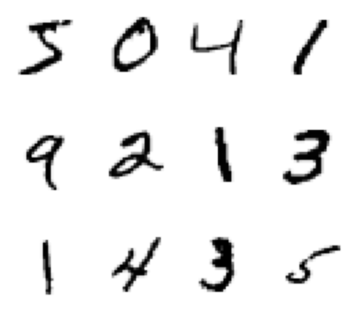

In [3]:
plt.figure(figsize=(5,5))
for k in range (12):
  plt.subplot(3,4,k+1)
  plt.imshow(X_train[k],cmap='Greys')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
X_valid.shape

(10000, 28, 28)

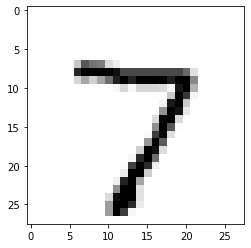

In [5]:
plt.imshow(X_valid[0], cmap='Greys')

In [ ]:
X_valid[0]

#### Preprocessing of data

In [6]:
X_train=X_train.reshape(60000,784).astype('float32')
X_valid=X_valid.reshape(10000,784).astype('float32')

In [7]:
X_train/=255
X_valid/=255

In [8]:
n_class=10
y_train=to_categorical(y_train,n_class)
y_valid=to_categorical(y_valid,n_class)
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Designing NN Architecture


In [21]:
model=Sequential()
#hidden layer
model.add(Dense(64, activation='relu',input_shape=(784,)))
#hidden layer
model.add(Dense(32, activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])

#### Training of Model

In [25]:
model.fit(X_train, y_train,batch_size=228,epochs=200, verbose=1,validation_data=(X_valid,y_valid))

Epoch 1/200
264/264 [==============================] - 1s 4ms/step - loss: 0.0693 - accuracy: 0.5321 - val_loss: 0.0686 - val_accuracy: 0.5439
Epoch 2/200
264/264 [==============================] - 1s 4ms/step - loss: 0.0692 - accuracy: 0.5334 - val_loss: 0.0684 - val_accuracy: 0.5451
Epoch 3/200
264/264 [==============================] - 1s 4ms/step - loss: 0.0690 - accuracy: 0.5351 - val_loss: 0.0683 - val_accuracy: 0.5464
Epoch 4/200
264/264 [==============================] - 1s 4ms/step - loss: 0.0689 - accuracy: 0.5365 - val_loss: 0.0681 - val_accuracy: 0.5476
Epoch 5/200
264/264 [==============================] - 1s 4ms/step - loss: 0.0687 - accuracy: 0.5378 - val_loss: 0.0679 - val_accuracy: 0.5485
Epoch 6/200
264/264 [==============================] - 1s 4ms/step - loss: 0.0685 - accuracy: 0.5390 - val_loss: 0.0678 - val_accuracy: 0.5502
Epoch 7/200
264/264 [==============================] - 1s 4ms/step - loss: 0.0684 - accuracy: 0.5408 - val_loss: 0.0676 - val_accuracy: 0.5514

#### Model Performence evaluation

In [26]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.7700


[0.04043659567832947, 0.7699999809265137]

In [28]:
valid_0=X_valid[0].reshape(1, 784)

In [30]:
model.predict(valid_0)

array([[0.00773427, 0.00477716, 0.01955234, 0.06974342, 0.01355842,
        0.00196113, 0.03901572, 0.76513904, 0.0109539 , 0.0675646 ]],
      dtype=float32)

In [29]:
model.predict_classes(valid_0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7])